In [17]:
import zipfile
import os

zip_file_path = '/Users/shamiksinha/Desktop/2022468_HW2/AudioData.zip'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/Users/shamiksinha/Desktop/2022468_HW2/dataset_folder')

KeyboardInterrupt: 

In [18]:
import os 
import librosa
import pandas as pd
import numpy as np

# Path to the dataset
dataset_path = '/Users/shamiksinha/Desktop/2022468_HW2/dataset_folder/data'  # Change this to your dataset path
class_dirs = os.listdir(dataset_path)

 

In [4]:

# Initialize storage for amplitude and duration data
class_stats = {}

# Iterating thru each class folder
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):
        amplitudes = []
        durations = []
        
        # Processing each audio file
        for audio_file in os.listdir(class_folder):
            if audio_file.endswith('.wav'):
                file_path = os.path.join(class_folder, audio_file)
                # Loading the audio file
                audio, sr = librosa.load(file_path, sr=16000)
                amplitudes.extend(audio)
                durations.append(librosa.get_duration(y=audio, sr=sr))
        
        # statsss
        class_stats[class_name] = {
            'amplitude_mean': np.mean(amplitudes),
            'amplitude_std': np.std(amplitudes),
            'duration_mean': np.mean(durations),
            'duration_std': np.std(durations),
        }

stats_df = pd.DataFrame(class_stats).T
print(stats_df)


                    amplitude_mean  amplitude_std  duration_mean  duration_std
right                 3.956009e-05       0.083249       0.982247      0.069384
eight                -2.228608e-05       0.076257       0.980846      0.072674
cat                  -2.848707e-04       0.075283       0.972065      0.082352
tree                  7.703462e-06       0.075752       0.970302      0.087405
backward              8.732759e-05       0.088580       0.986390      0.062503
learn                -1.415779e-05       0.099211       0.974443      0.091856
bed                   6.745067e-05       0.085237       0.970498      0.087123
happy                -1.958642e-04       0.073446       0.974747      0.079439
go                   -1.678797e-04       0.096900       0.978847      0.076180
dog                  -4.608296e-04       0.093553       0.972226      0.084845
no                    2.396618e-05       0.088122       0.980128      0.073188
wow                   3.483540e-05       0.096585   

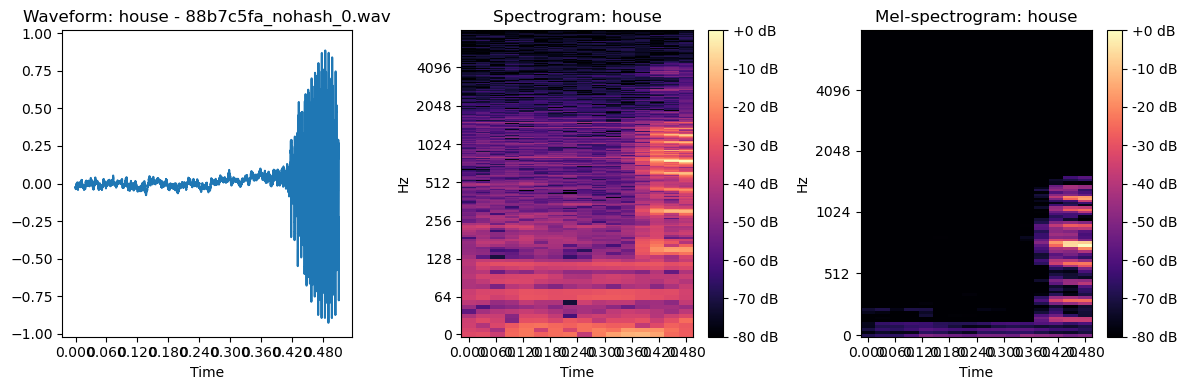

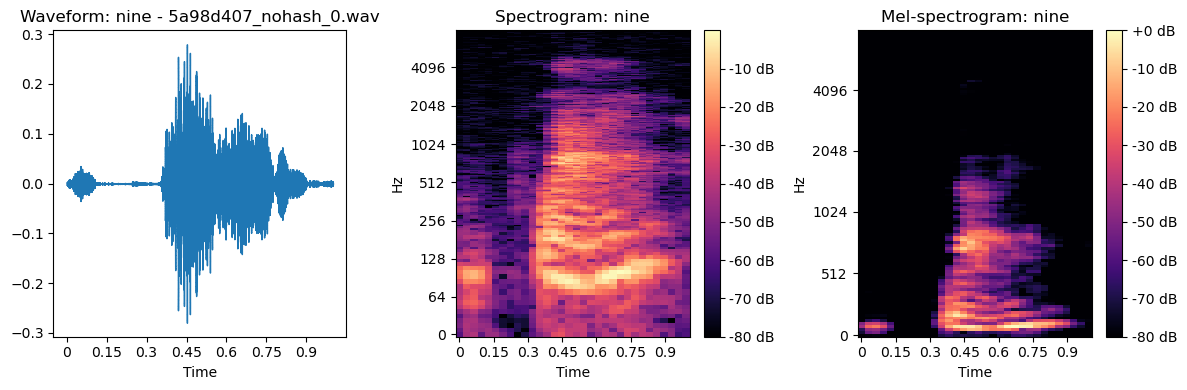

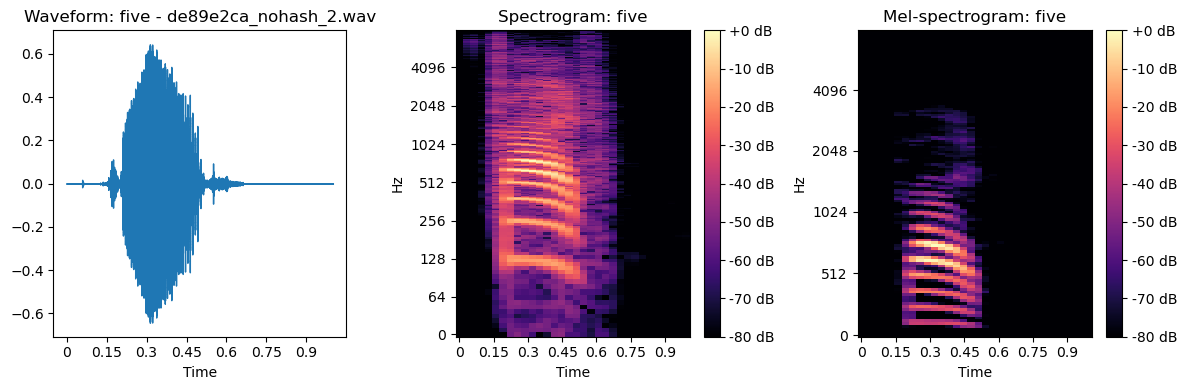

In [8]:
import random
import matplotlib.pyplot as plt
import librosa.display

# Randomly select classes
selected_classes = random.sample(os.listdir(dataset_path), 3)
for class_name in selected_classes:
    class_folder = os.path.join(dataset_path, class_name)
    audio_file = random.choice(os.listdir(class_folder))
    
    # Loading the audio file
    audio, sr = librosa.load(os.path.join(class_folder, audio_file), sr=16000)
    
    # Plot waveform
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Waveform: {class_name} - {audio_file}')
    
    # Plot spectrogram
    plt.subplot(1, 3, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram: {class_name}')
    
    # Plot Mel-spectrogram
    plt.subplot(1, 3, 3)
    # Correct usage of librosa.feature.melspectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-spectrogram: {class_name}')
    
    plt.tight_layout()
    plt.show()


{'right': 3778, 'eight': 3787, 'cat': 2031, 'tree': 1759, 'backward': 1664, 'learn': 1575, 'bed': 2014, 'happy': 2054, 'go': 3880, 'dog': 2128, 'no': 3941, 'wow': 2123, 'follow': 1579, 'nine': 3934, 'left': 3801, 'stop': 3872, 'three': 3727, '_background_noise_': 7, 'sheila': 2022, 'one': 3890, 'bird': 2064, 'zero': 4052, 'seven': 3998, 'up': 3723, 'visual': 1592, 'marvin': 2100, 'two': 3880, 'house': 2113, 'down': 3917, 'six': 3860, 'yes': 4044, 'on': 3845, 'five': 4052, 'forward': 1557, 'off': 3745, 'four': 3728}


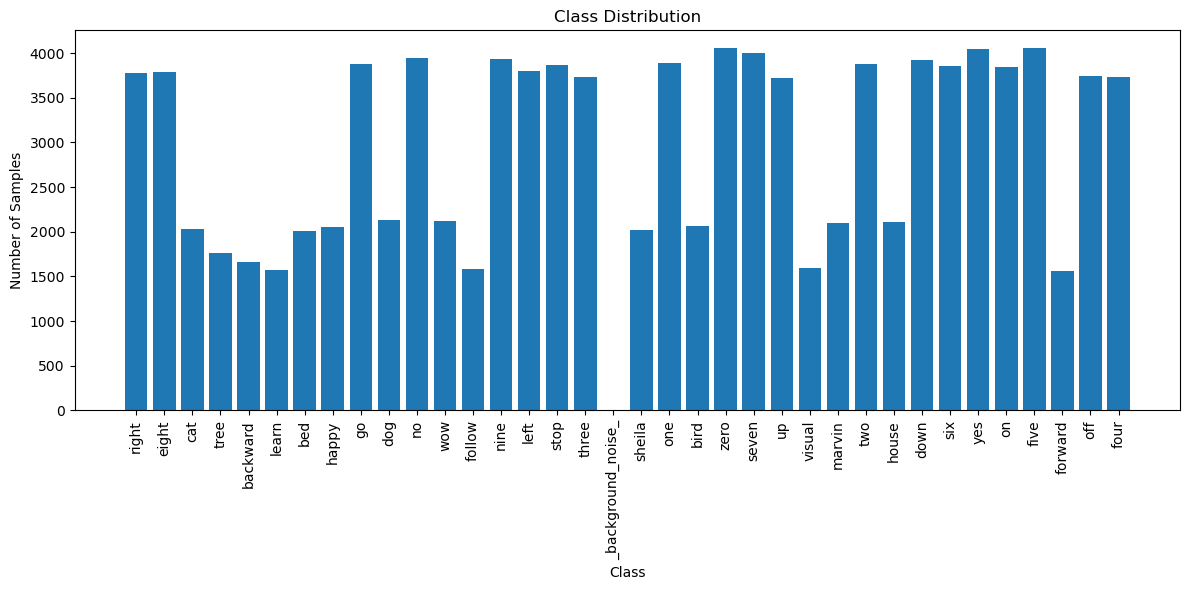

In [19]:

 
import os
import matplotlib.pyplot as plt

# Counting samples per class
class_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in os.listdir(dataset_path)}
print(class_counts)

# Plotting class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.tight_layout()
plt.show()



In [20]:
import os
import random
import shutil
from collections import Counter

min_class_size = 1557

# Creating undersampled dataset
undersampled_dataset_path = 'undersampled_data'
os.makedirs(undersampled_dataset_path, exist_ok=True)
 

def create_output_dir(output_path):
    #Create output dir
    os.makedirs(output_path, exist_ok=True)

def get_audio_files(class_path):
    # """Return audio files."""
    return os.listdir(class_path)

def undersample_class_files(file_list, target_size):
    #Undersample files
    if len(file_list) > target_size:
        return random.sample(file_list, target_size)
    return file_list

def copy_files_to_destination(files, src_dir, dst_dir):
    #Copy files.
    for file_name in files:
        src = os.path.join(src_dir, file_name)
        dst = os.path.join(dst_dir, file_name)
        shutil.copy(src, dst)

def perform_undersampling(dataset_path, output_dataset_path, class_counts, min_class_size):
    # """Main undersampling process."""
    for class_name, sample_count in class_counts.items():
        class_path = os.path.join(dataset_path, class_name)
        output_class_path = os.path.join(output_dataset_path, class_name)
        
        create_output_dir(output_class_path)  # Create dir
        
        audio_file_list = get_audio_files(class_path)  # Geting files
        
        selected_files = undersample_class_files(audio_file_list, min_class_size)  # Undersamplingg
        
        copy_files_to_destination(selected_files, class_path, output_class_path)  # Copying files
    
    print("Undersampling complete.")

# Example call
perform_undersampling(dataset_path, undersampled_dataset_path, class_counts, min_class_size)
 


Undersampling complete.
Undersampling complete.


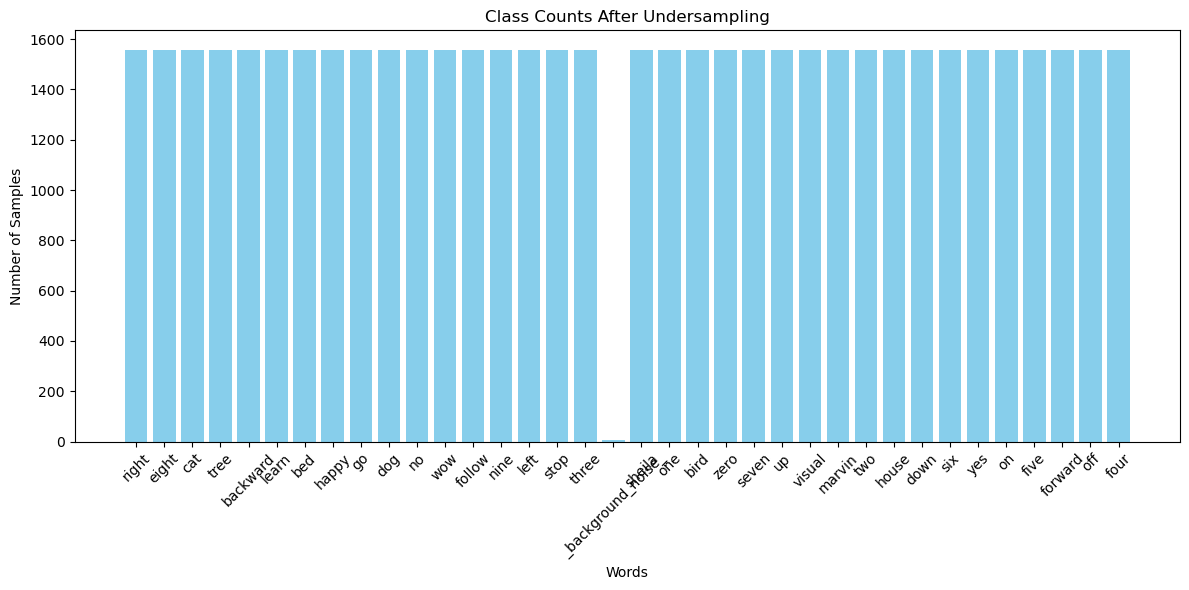

In [21]:
import os
import matplotlib.pyplot as plt
from collections import Counter
 
undersampled_dataset_path = '/Users/shamiksinha/Desktop/2022468_HW2/undersampled_data'  # Update this path if necessary

# Counting the samples  
class_counts = Counter()
for word in os.listdir(undersampled_dataset_path):
    word_path = os.path.join(undersampled_dataset_path, word)
    if os.path.isdir(word_path):
        class_counts[word] = len(os.listdir(word_path))

# Prepare data for plotting
words = list(class_counts.keys())
counts = list(class_counts.values())

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Number of Samples')
plt.title('Class Counts After Undersampling')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [25]:
import os
import librosa
import numpy as np
import soundfile as sf  

threshold = 0.01  # Define a threshold for silence
cleaned_audio_files = []

dataset_path = undersampled_dataset_path

cleaned_dataset_path = '/Users/shamiksinha/Desktop/2022468_HW2/cleaned_data'
 
if not os.path.exists(cleaned_dataset_path):
    os.makedirs(cleaned_dataset_path)
 
threshold = 0.01  # Amplitude threshold for silence

for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
     
    cleaned_class_folder = os.path.join(cleaned_dataset_path, class_name)
    os.makedirs(cleaned_class_folder, exist_ok=True)

    for audio_file in os.listdir(class_folder):
        if audio_file.endswith('.wav'):
            audio, sr = librosa.load(os.path.join(class_folder, audio_file), sr=16000)
            
            # Detect silent segments
            silent_segments = np.where(np.abs(audio) < threshold)[0]
            
            # Check if the proportion of silent segments is acceptable (e.g., less than 50%)
            if len(silent_segments) < len(audio) * 0.5:  
                # Saveing cleaned audio  
                cleaned_file_path = os.path.join(cleaned_class_folder, audio_file)
                sf.write(cleaned_file_path, audio, sr)  # Usinge soundfile to save the audio

print("Cleaned audio files have been saved successfully.")


Cleaned audio files have been saved successfully.


In [28]:
 
import librosa.display
from scipy.signal import butter, lfilter
 
 
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y
 
def extract_features_with_filter(audio_path, lowcut=300, highcut=3400):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=16000)
     
    filtered_audio = bandpass_filter(audio, lowcut, highcut, sr)
    
    # Extract features from the filtered audio
    mfccs = librosa.feature.mfcc(y=filtered_audio, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=filtered_audio, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=filtered_audio, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=filtered_audio, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=filtered_audio)
    
    # Compute the mean of each feature across time
    features = {
        'mfccs': np.mean(mfccs, axis=1),
        'chroma': np.mean(chroma, axis=1),
        'spectral_centroid': np.mean(spectral_centroid),
        'spectral_bandwidth': np.mean(spectral_bandwidth),
        'zero_crossing_rate': np.mean(zero_crossing_rate)
    }
    
    return features

all_features = []
 
for class_name in os.listdir(cleaned_dataset_path):
    class_folder = os.path.join(cleaned_dataset_path, class_name)
    
    for audio_file in os.listdir(class_folder):
        if audio_file.endswith('.wav'):
            audio_path = os.path.join(class_folder, audio_file)
            features = extract_features_with_filter(audio_path)   
            features['class'] = class_name  # Adding class label to features
            all_features.append(features)
 
features_array = np.array(all_features, dtype=object)
 
print(f"Extracted features from {len(features_array)} audio files.")


Extracted features from 9619 audio files.


In [45]:
import numpy as np


X = np.array([f['mfccs'] for f in features_array])  # Extract features
y = np.array([f['class'] for f in features_array])  # Extract class labels
 
np.random.seed(42)  # For reproducibility
indices = np.arange(len(X))
np.random.shuffle(indices)

# Split the dataset (80:20)
split_index = int(0.8 * len(X))
train_indices = indices[:split_index]
test_indices = indices[split_index:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 7695
Test set size: 1924


In [35]:
import numpy as np

class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)  # Unique class labels
        self.mean = {}
        self.variance = {}
        self.prior = {}
        
        for cls in self.classes:
            X_cls = X[y == cls]  # Geting all samples for this class
            self.mean[cls] = np.mean(X_cls, axis=0)
            self.variance[cls] = np.var(X_cls, axis=0)
            self.prior[cls] = len(X_cls) / len(X)  # Calculating prior probability

    def gaussian_probability(self, x, mean, var):
        """Calculate the Gaussian probability density function."""
        exponent = np.exp(- ((x - mean) ** 2) / (2 * var))
        return (1 / np.sqrt(2 * np.pi * var)) * exponent

    def predict(self, X):
        predictions = []
        
        for x in X:
            posteriors = []  # Store posterior probabilities for each class
            
            for cls in self.classes:
                # Calculate the likelihood
                likelihood = np.prod(self.gaussian_probability(x, self.mean[cls], self.variance[cls]))
                # Calculate the posterior probability
                posterior = likelihood * self.prior[cls]
                posteriors.append(posterior)
            
            # Choosing the class with the highest posterior probability
            predictions.append(self.classes[np.argmax(posteriors)])
        
        return np.array(predictions)


In [36]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
 
y_pred = nb.predict(X_test)
 
accuracy = np.mean(y_pred == y_test)
print(f"Naive Bayes Test Accuracy: {accuracy:.2f}")

Naive Bayes Test Accuracy: 0.19


In [37]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
      
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return y_predicted


In [48]:
def label_encode(y):
     
    unique_labels = list(set(y))
    label_to_numeric = {label: idx for idx, label in enumerate(unique_labels)}
    
    y_numeric = [label_to_numeric[label] for label in y]
    
    return y_numeric
 
y_numeric = label_encode(y)

# print("Original Labels:", y)
# print("Encoded Labels:", y_numeric)


In [51]:

 
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_numeric[:train_size], y_numeric[train_size:]

p = Perceptron(learning_rate=0.01, n_iter=10)
p.fit(X_train, y_train)

# Predictions on the test set
y_pred = p.predict(X_test)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Perceptron Test Accuracy: {accuracy:.2f}")

Perceptron Test Accuracy: 0.10


In [43]:
import pickle

model_filename = '2022468_pickledModel_B.pkl'

# Open a file where you want to store the model and save it
with open(model_filename, 'wb') as file:
    pickle.dump(nb, file)  # Saving the model

In [46]:
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to predict or evaluate
y_pred = loaded_model.predict(X_test)
# y_pred = [list(x).index(max(x)) for x in y_pred] #for lightboosted model

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print(f"Test accuracy from loaded model: {accuracy:.4f}")


Test accuracy from loaded model: 0.1933
